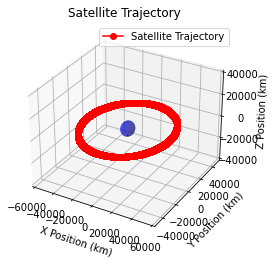

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Initial Conditions
r0 = np.array([42000, 0, 0])
v0 = np.array([0, 3.0807, 0])

# Constants
mu = 398600.4418    # Earth Gravitational Parameter in km^3/s^2
dt = 1.0            # seconds
M = 5.972e+24       # Earth mass in kg
G = 6.67430e-20     # Gravitational constant in km^3/(kg*s^2)

# Equations of Motion
# r' = v
# v' = (-mu / |r|^3) * r

# Number of time steps
num_steps = 5 * 24 * 60 * 60    # 5 days in seconds

# Lists to store earth and satellite positions
earth_pos = []
sat_pos = []


# Function to compute acceleration
def acceleration(r, M):
    r_norm = np.linalg.norm(r)
    return -G * M * r / r_norm ** 3

# Function to compute one Runge-Kutta integration step
def runge_kutta(r, v, dt, M):
    t1_v = acceleration(r, M)
    t1_r = v
    t2_v = acceleration(r + 0.5 * dt * t1_r, M)
    t2_r = v + 0.5 * dt * t1_v
    t3_v = acceleration(r + 0.5 * dt * t2_r, M)
    t3_r = v + 0.5 * dt * t2_v
    t4_v = acceleration(r + dt * t3_r, M)
    t4_r = v + dt * t3_v

    new_r = r + (dt / 6.0) * (t1_r + 2 * t2_r + 2 * t3_r + t4_r)
    new_v = v + (dt / 6.0) * (t1_v + 2 * t2_v + 2 * t3_v + t4_v)

    return new_r, new_v

# Function to predict trajectory
def predict_traj(r0, v0, dt, N):
    traj = [(r0, v0)]
    for _ in range(N):
        r, v = traj[-1]
        new_r, new_v = runge_kutta(r, v, dt, M)
        traj.append((new_r, new_v))
    return traj

# PREDICT TRAJECTORY
trajectory = predict_traj(r0, v0, dt, num_steps)

# Function to animate 2D trajectory
def animate_traj(i):
    plt.cla()
    # x and y coord for each time step
    r, _ = trajectory[i]
    x, y = r[0], r[1]

    # Plot Earth
    earth_radius = 6371  # Earth's radius in km
    earth_circle = plt.Circle((0, 0), earth_radius, color='blue', alpha=0.5)
    plt.gcf().gca().add_artist(earth_circle)

    # Plot satellite trajectory
    plt.plot(x, y, 'ro', label='Satellite Position')
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.title(f'Satellite Trajectory (Step {i})')
    plt.legend()
    # plt.axis('equal')
    plt.xlim(-60000, 60000)
    plt.ylim(-50000, 50000)
    plt.grid(True)

# Function to plot 2D trajectory
def plot_traj(trajectory):
    plt.cla()
    # x and y coord for each time step
    x = [r[0] for r, _ in trajectory]
    y = [r[1] for r, _ in trajectory]

    # Plot Earth
    earth_radius = 6371  # Earth's radius in km
    earth_circle = plt.Circle((0, 0), earth_radius, color='blue', alpha=0.5)
    plt.gcf().gca().add_artist(earth_circle)

    # Plot satellite trajectory
    plt.plot(x, y, '-o', label='Satellite Trajectory')
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.title('Satellite Trajectory')
    plt.legend()
    # plt.axis('equal')
    plt.xlim(-50000, 50000)
    plt.ylim(-50000, 50000)
    plt.grid(True)
    plt.show()

# Function to create 3D plot
def plot_3d_traj():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the Earth as a sphere
    earth_radius = 6371  # Earth's radius in km
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = earth_radius * np.outer(np.cos(u), np.sin(v))
    y = earth_radius * np.outer(np.sin(u), np.sin(v))
    z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='blue', alpha=0.5)

    # Extract x, y, and z coordinates for all time steps
    x_coords = [r[0] for r, _ in trajectory]
    y_coords = [r[1] for r, _ in trajectory]
    z_coords = [r[2] for r, _ in trajectory]

    # Plot the satellite trajectory
    ax.plot(x_coords, y_coords, z_coords, '-ro', label='Satellite Trajectory')
    ax.set_xlabel('X Position (km)')
    ax.set_ylabel('Y Position (km)')
    ax.set_zlabel('Z Position (km)')
    ax.set_title('Satellite Trajectory')
    ax.axes.set_xlim(-60000, 60000)
    ax.axes.set_ylim(-50000, 50000)
    ax.axes.set_zlim(-40000, 40000)
    ax.legend()

    plt.show()

# Function to create 3D animation
def animate_3d_traj(i):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the Earth as a sphere
    earth_radius = 6371  # Earth's radius in km
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = earth_radius * np.outer(np.cos(u), np.sin(v))
    y = earth_radius * np.outer(np.sin(u), np.sin(v))
    z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='blue', alpha=0.5)

    # Extract x, y, and z coordinates for the current time step
    r, _ = trajectory[i]
    x_coords, y_coords, z_coords = r[0], r[1], r[2]

    # Plot the satellite position
    ax.plot([x_coords], [y_coords], [z_coords], 'ro', label='Satellite Position')
    ax.set_xlabel('X Position (km)')
    ax.set_ylabel('Y Position (km)')
    ax.set_zlabel('Z Position (km)')
    ax.set_title(f'Satellite Trajectory (Step {i})')
    ax.legend()

# ANIMATE 2D TRAJECTORY
# fig, ax = plt.subplots()
# ani = FuncAnimation(fig, animate_traj, frames=range(0, len(trajectory), 100), interval=1, repeat=False)
# plt.show()

# PLOT 2D TRAJECTORY
# plot_traj(trajectory)

# PLOT 3D TRAJECTORY
plot_3d_traj()

# Animate 3D trajectory
# fig = plt.figure()
# ani = FuncAnimation(fig, animate_3d_traj, frames=range(0, len(trajectory), 100), interval=1, repeat=False)
# plt.show()

# PRINT TRAJECTORY and PLOT
# for i, (r, v) in enumerate(trajectory):
#     print(f"Time step {i}:")
#     print("Position:", r)
#     print("Velocity:", v)
#     print("------------------")